In [7]:

import sys
sys.path.append('./')


from Analyzation_relative import Data_process as DP
from Analyzation_relative import Descriptive_statistics as DS
from Analyzation_relative import Regression as Reg
from Analyzation_relative import Multivariate_statistical as MS
from Analyzation_relative.Statistical_inference import Normality_test

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import statsmodels.api as sm

#*----------------------------------------------------------------
mpl.rcParams['font.sans-serif'] = ['SimHei'] # *允许显示中文
plt.rcParams['axes.unicode_minus']=False# *允许显示坐标轴负数
#*----------------------------------------------------------------

params = {'legend.fontsize': 7,}

plt.rcParams.update(params)

# 数据的读取

In [8]:
df = pd.read_csv('data/test/winequality-white-nan.csv' , index_col=0)
# df = pd.read_csv('data/wine/winequality-white.csv' , index_col=0)
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,NaN,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6.0
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6.0


每列数据意义为：

固定的酸度 ; 挥发性酸度 ; 柠檬酸 ; 残糖 ; 氯化物 ; 游离二氧化硫 ; 总二氧化硫 ; 密度 ; pH值 ; 硫酸盐 ; 酒精 ; 质量



首先进行缺失值处理 ， 对于数值型数据，使用**均值填充**，对于分类型数据，使用**前项填充**

# 缺失值处理

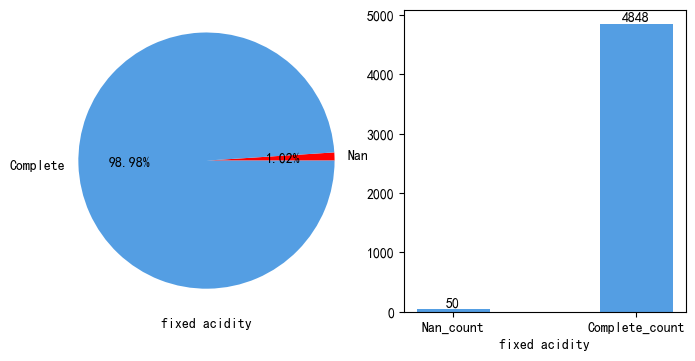

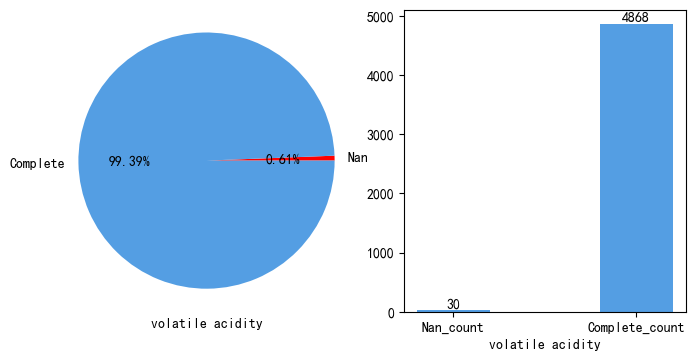

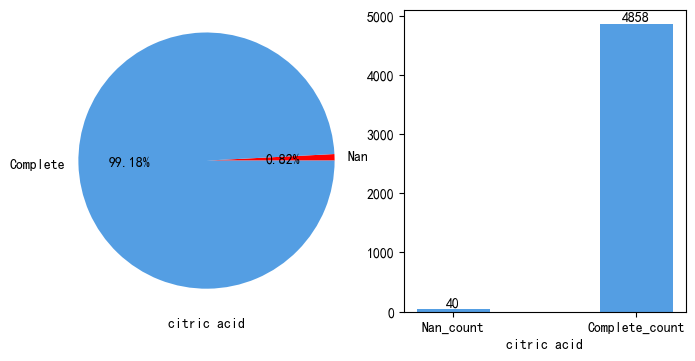

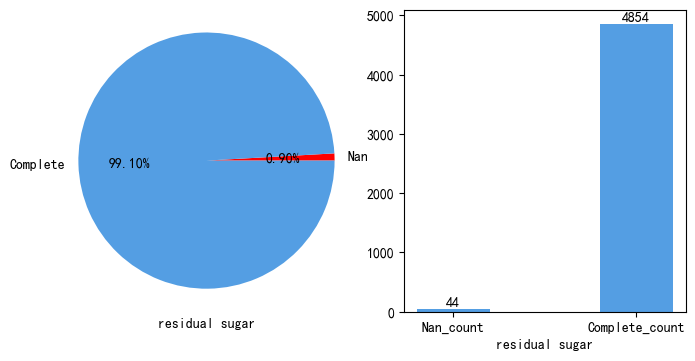

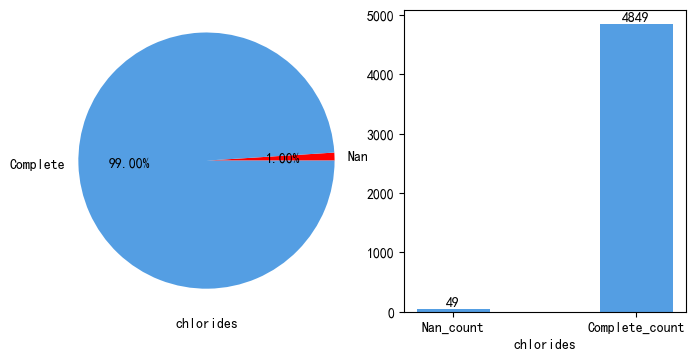

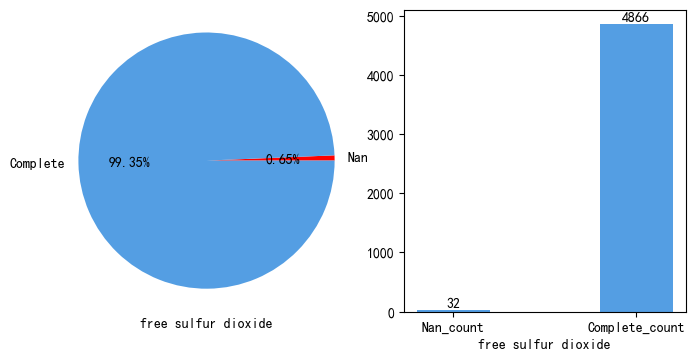

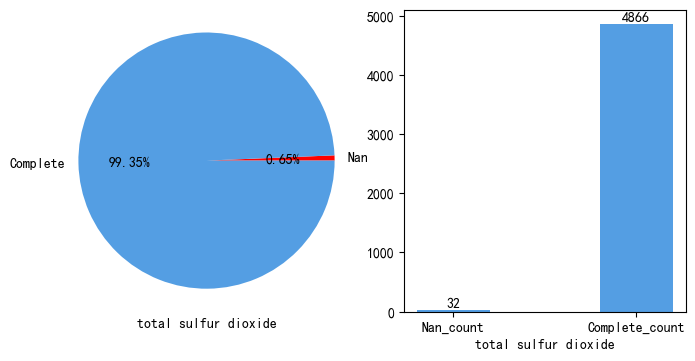

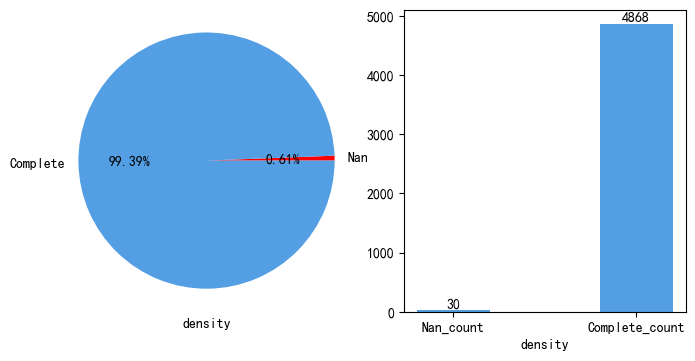

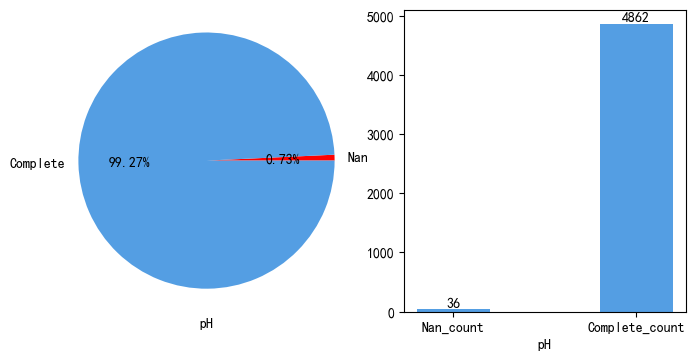

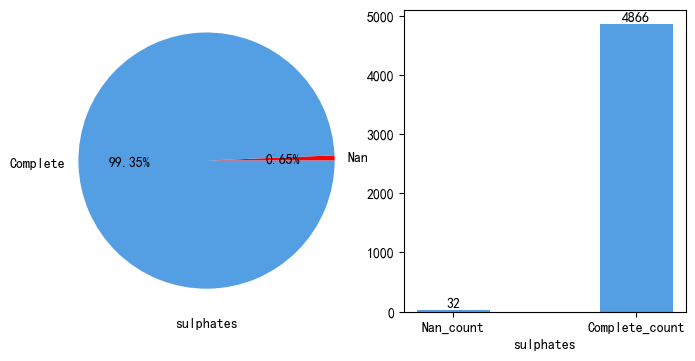

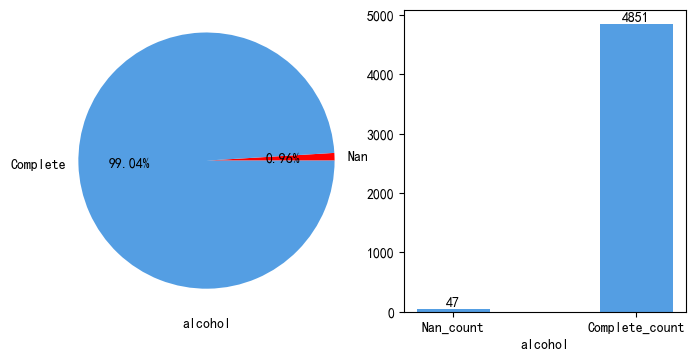

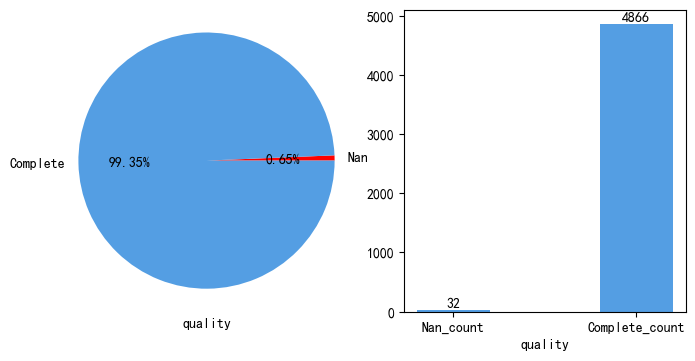

In [9]:
df_withNan , df_pro = DP.Nan_process(df , plot = True , numeric = 'median' , subtype='delete' , filepath = './test/wine/Nan_conditon')

可以看到挑出了带有缺失值的行

In [10]:
df_withNan

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,6.3,0.30,NaN,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0
13,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.99120,3.54,0.52,12.4,NaN
15,6.6,0.17,0.38,NaN,0.032,28.0,112.0,0.99140,3.25,0.55,11.4,7.0
28,7.4,NaN,0.48,1.1,0.047,17.0,132.0,0.99140,3.19,0.49,11.6,6.0
31,8.3,0.14,0.34,1.1,NaN,7.0,47.0,0.99340,3.47,0.40,10.2,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4815,6.2,NaN,0.01,3.2,0.041,18.0,120.0,0.99026,3.20,0.94,13.7,7.0
4820,NaN,0.36,0.50,1.0,0.127,63.0,178.0,NaN,3.10,0.45,9.7,5.0
4826,6.0,0.34,0.29,6.1,NaN,29.0,134.0,0.99462,3.48,0.57,10.7,6.0
4852,6.2,0.23,0.38,1.6,0.044,12.0,113.0,0.99176,NaN,0.73,11.4,5.0


可以看到带有缺失值的行均被处理了

In [11]:
df_pro

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6.0
1,6.3,0.30,0.32,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0


# 异常值处理

首先我们可能更关注那些数据可能出现了较为明显的异常现象，哪些数据没有，所以可以先进行一轮描述性统计

对应文件夹 5_10_21_37

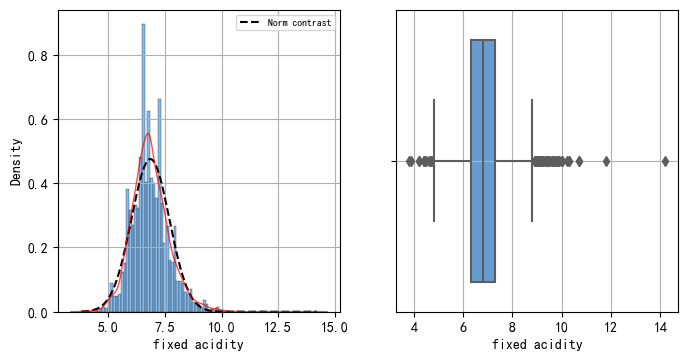

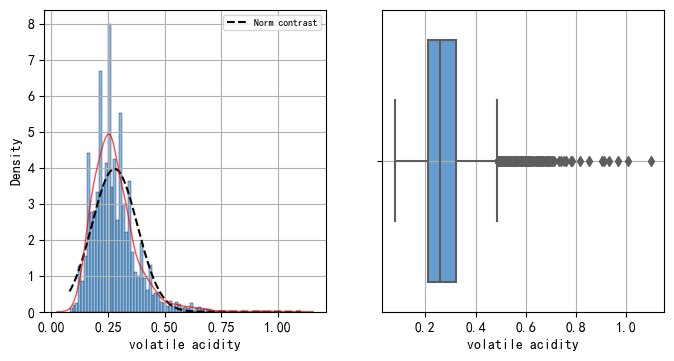

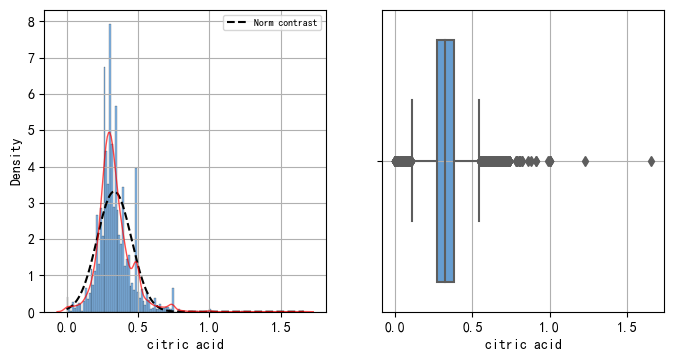

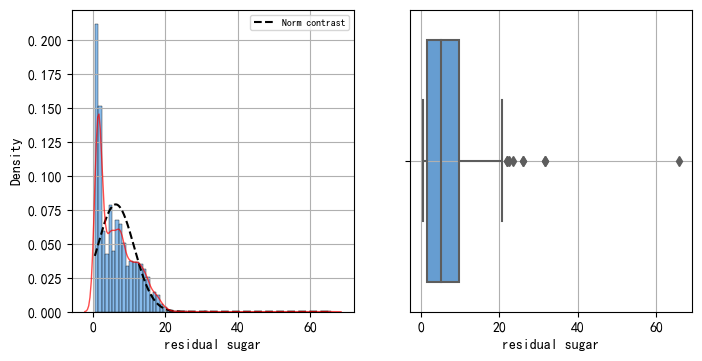

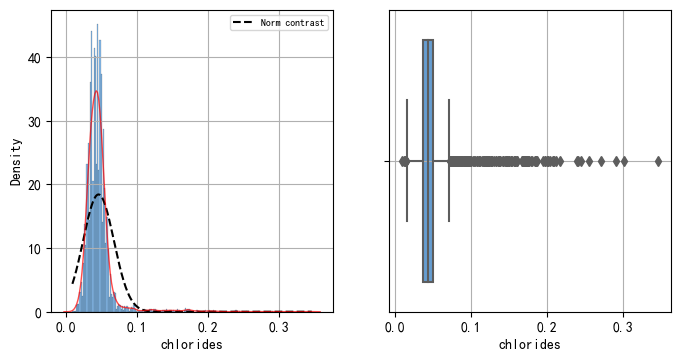

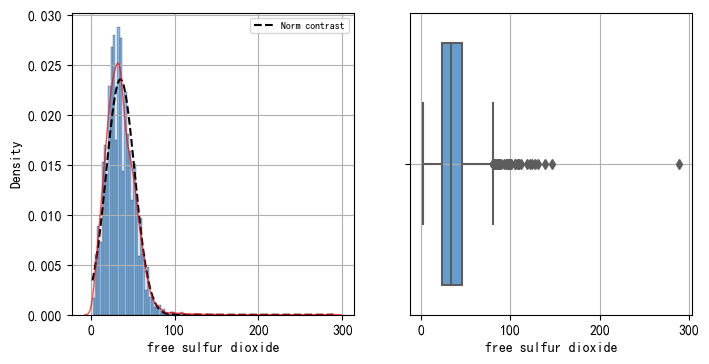

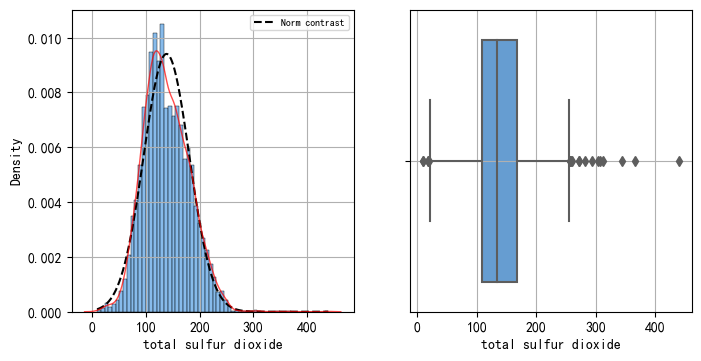

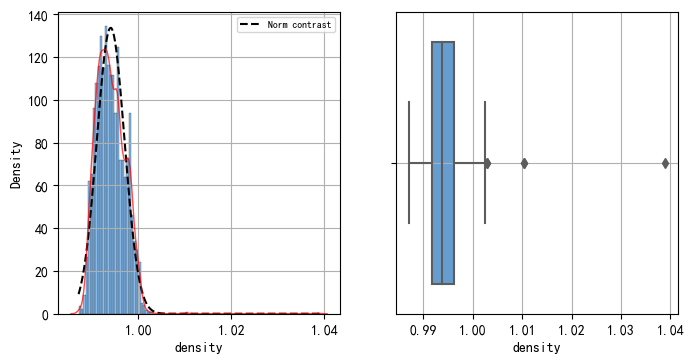

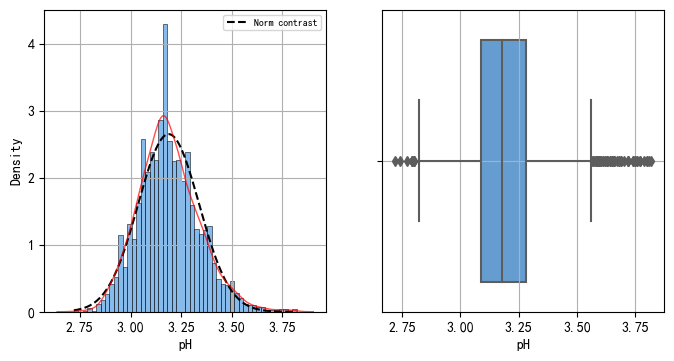

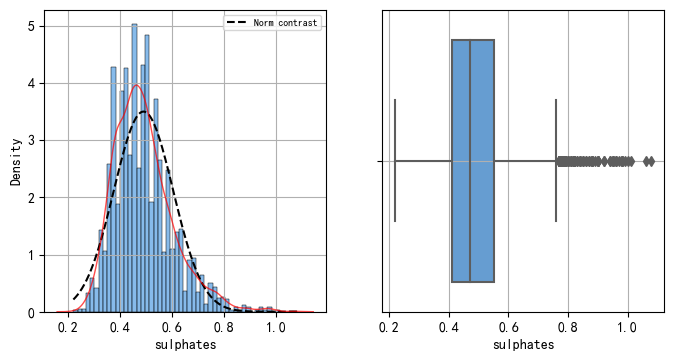

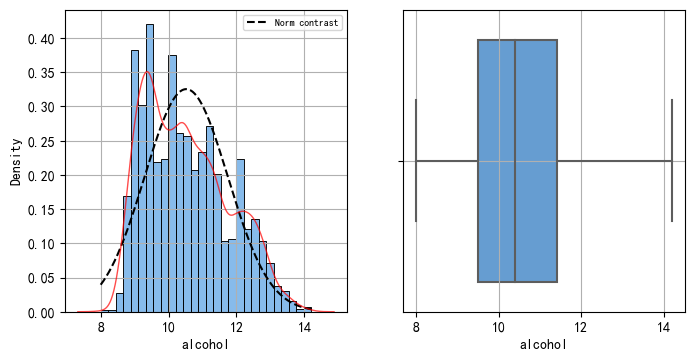

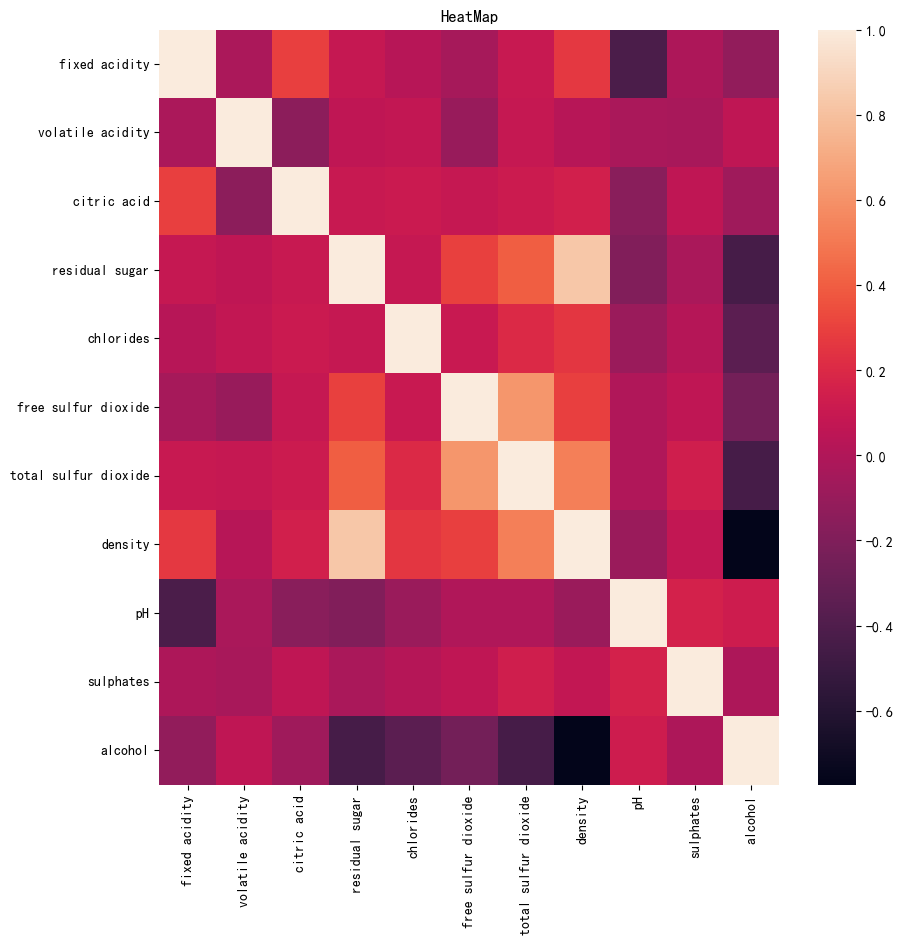

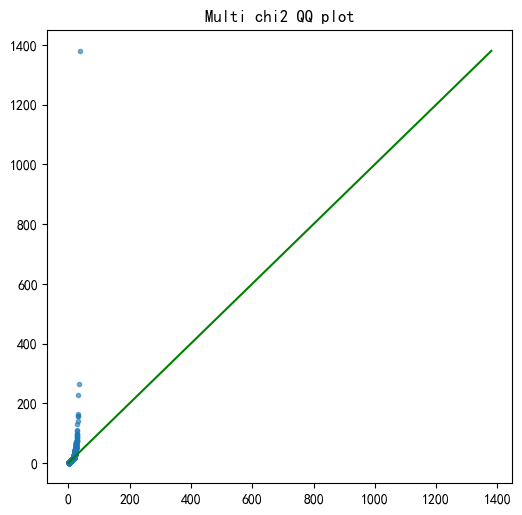

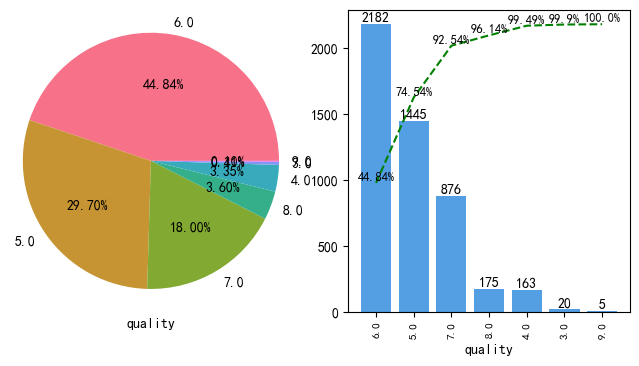

In [12]:
DS.Auto_plt(df_pro , dataclass = [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 2] , filepath='./test/wine/descriptive_result')

可以初步的从图像中看到，residual suger 和 density貌似出现了零星的几个异常值，需要挑出来，其余数据暂且可以忽略不计
所以先针对这两个变量进行异常值剔除

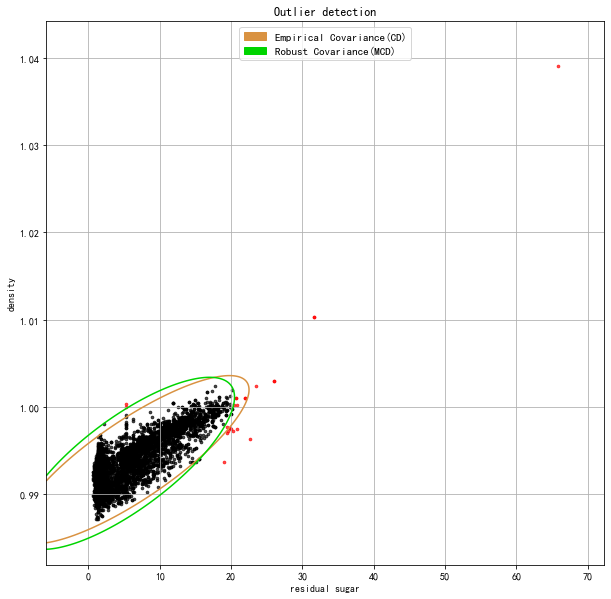

In [16]:
outer_index , type_index , df_outpro = DP.Outlier_TreatAndPlot(df_pro[['residual sugar' , 'density']] , filepath = './test/wine/Nan_conditon' , contamination = 0.005)

In [17]:
df_pro.loc[ outer_index, ['residual sugar' , 'density']]

,residual sugar,density
0,20.70,1.00100
7,20.70,1.00100
181,1.20,0.99360
190,8.50,0.99620
408,1.20,0.99200
442,2.20,0.98980
1260,7.10,0.99520
1597,7.30,0.99560
1642,15.55,0.99980
1652,1.00,0.99280


上述过程中可以看到，成功的依照MCD筛选出了有异常的残糖和密度对应的样品
随后进行剔除即可

In [20]:
df_outpro = df_pro.drop(outer_index , axis = 0 , inplace = False)

# 描述性统计

剔除完异常值之后可以进行进一步的描述性统计过程

对应文件夹为5_10_21_48

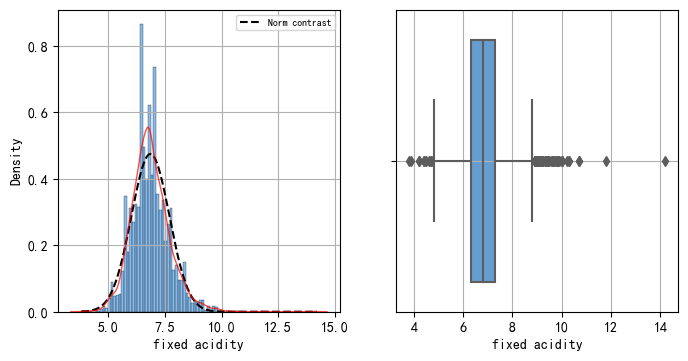

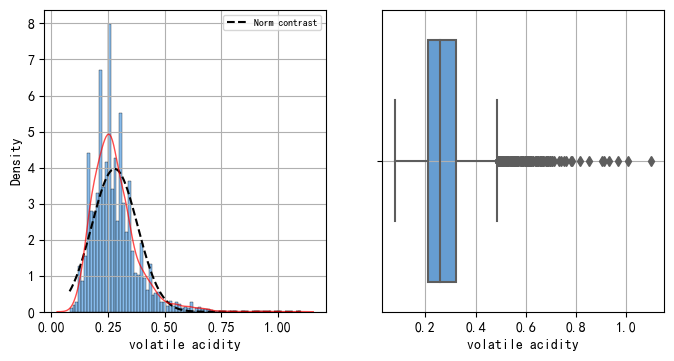

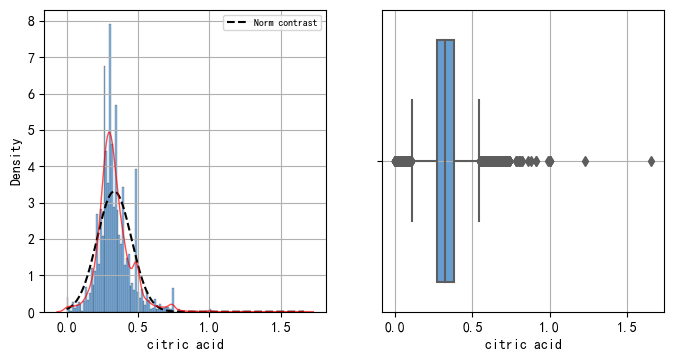

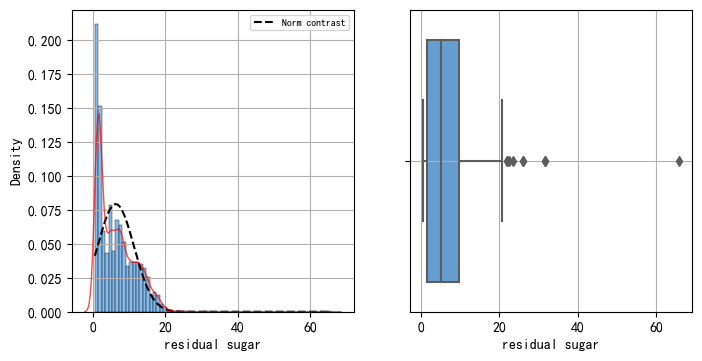

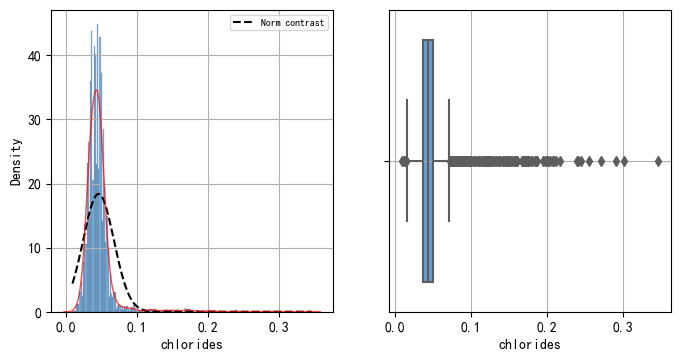

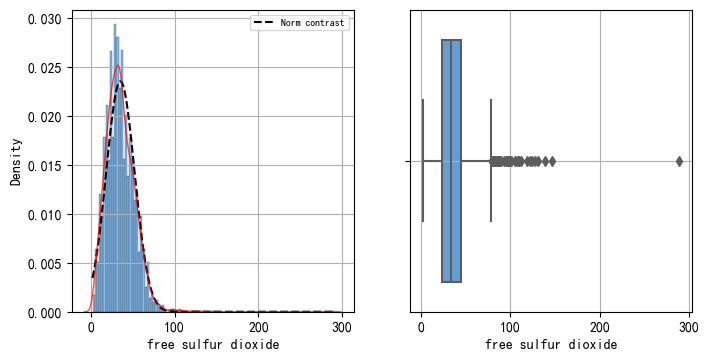

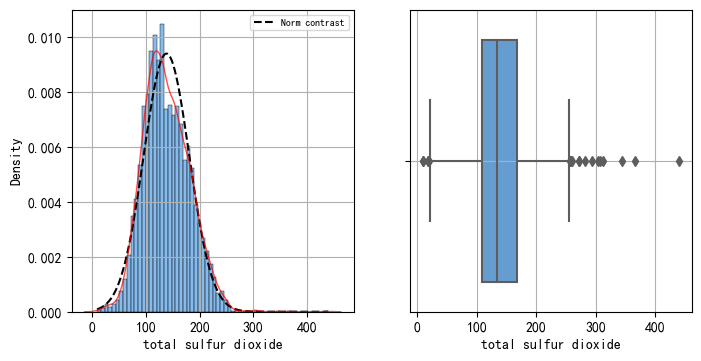

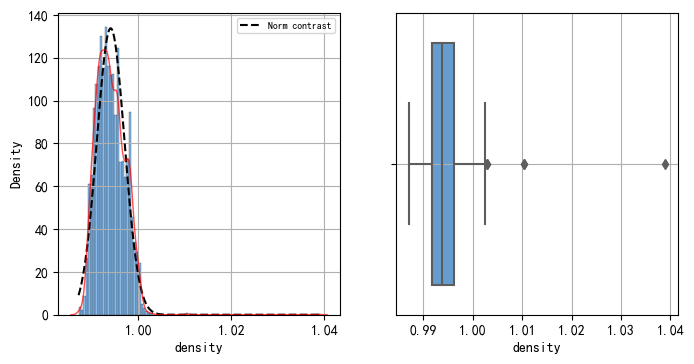

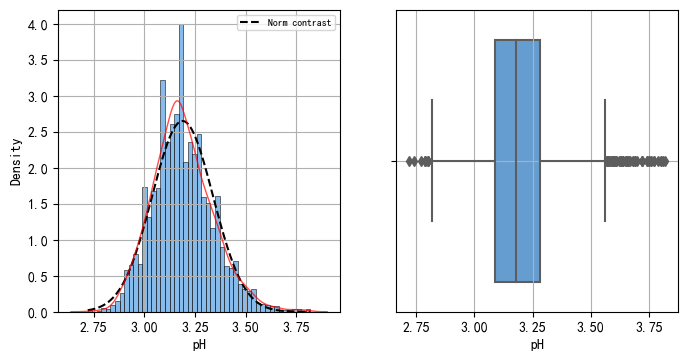

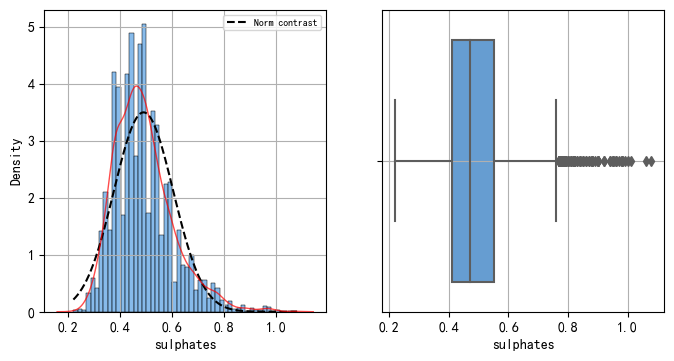

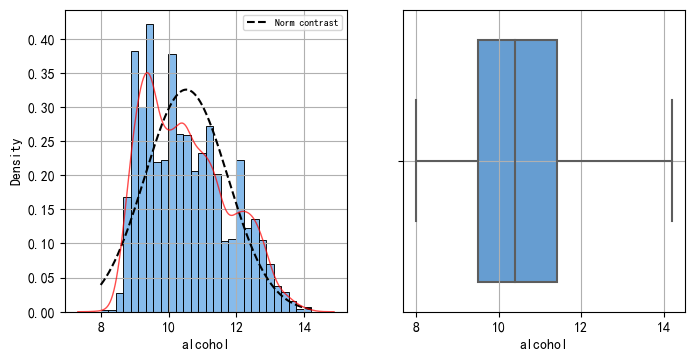

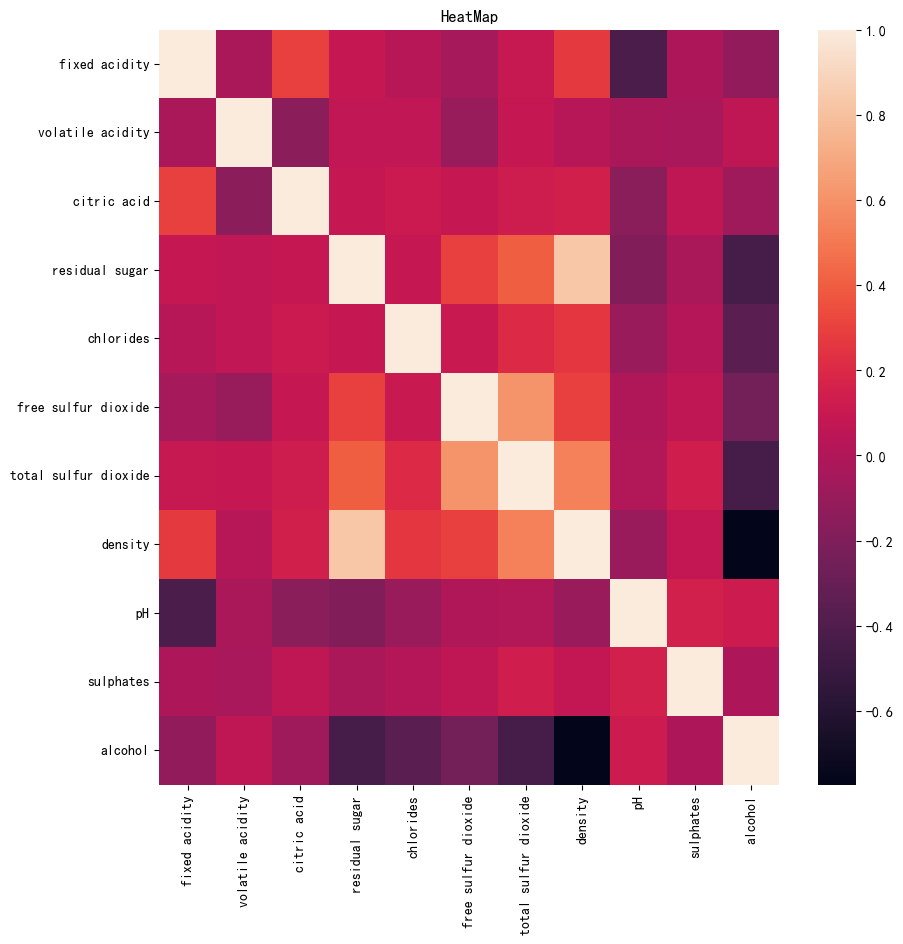

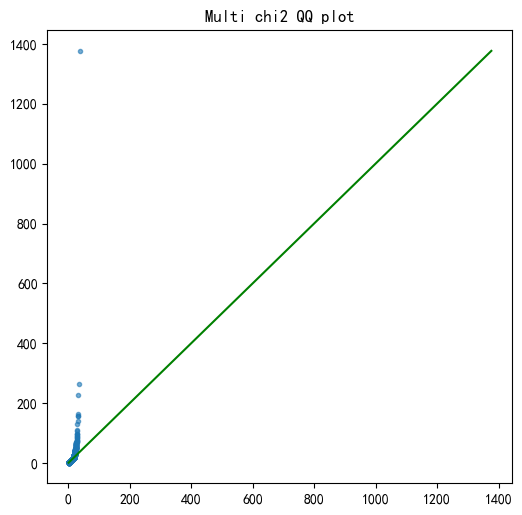

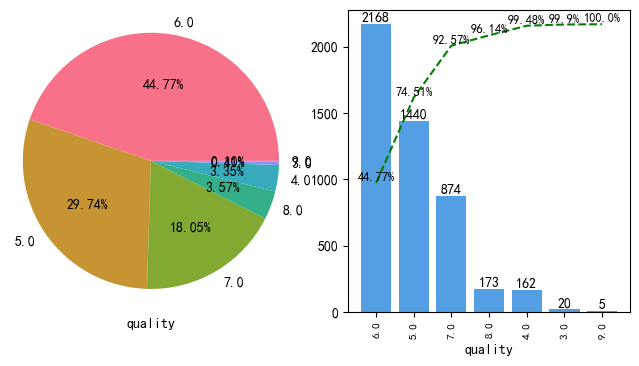

In [21]:
DS.Auto_plt(df_outpro , dataclass = DS.DataLabeling(df_outpro) , filepath='./test/wine/descriptive_result')

可以看到剔除完异常值后，残糖和密度正常了不少。

# 探索性建模

此时，我更关注酒精含量和各个变量之间的关系，即alcohol作为被解释变量，其余变量为解释变量。

我希望函数能够自动识别数据类型，同时因为没有二分变量，我希望函数能够意识到这个问题

此处因为可能会调用多线程，所以无法在jupyter nootbook中进行，下面将会对结果进行粘贴

因此，需要先将处理完好的数据进行导出

In [22]:
df_outpro.to_csv('data/test/winequality-white-processed.csv')

随后在.py文件中运行如下代码：
```python
new_df = pd.read_csv('./data/test/winequality-white-processed.csv' , index_col = 0)
mode , Xlist , args_list , result_list = Automatic_reg(new_df , dataclass = None ,target_col = 'alcohol' ,  mode = None, filepath = './test/wine')
```

得到的结果位于5_10_22_12当中

终端给出的信息为：

UserWarning: There is no binary variable in X , ignored this mode : dummy and linear

UserWarning: There is no binary variable in X , ignored this mode : dummy and polynomial

可以看到，正确识别了参数中并不存在二分变量，程式具有较强的鲁棒性

同时，从结果来看，线性模型的调整的 $R^2$ 为0.833，而多项式模型的调整的$R^2$为0.880 ， 相对更好一些，但是都不满足基本假定，因此说明可能需要进一步研究

至此，整个流程已经完成，可以说明程式可以实现初步的数据分析自动化以及分析流程的加速